In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

DICT_PATH = r'D:\งาน\KMITL\ปี3\ปี3เทอม2\Introduction to Data Analytics\Assignment\Project\Garbage Classification\img_dict.obj'
# path of dict prepared by to_dict.py

In [2]:
# load prepared dict
with open(DICT_PATH, 'rb') as file:
    img_dict = pickle.load(file)
print(img_dict.keys())

dict_keys(['file_name', 'image', 'class_name', 'class_no'])


In [3]:
print('Ex: ' + str(img_dict['file_name'][:5]))
print('Size: ' + str(len(img_dict['file_name'])))

Ex: ['metal1.jpg', 'metal10.jpg', 'metal100.jpg', 'metal101.jpg', 'metal102.jpg']
Size: 21984


In [4]:
print('Ex: ' + str(img_dict['image'][0]))
print('Shape: ' + str(img_dict['image'].shape))
print('Type: ' + str(img_dict['image'].dtype))

Ex: [[[254. 254. 248.]
  [236. 228. 210.]
  [247. 242. 227.]
  ...
  [227. 229. 226.]
  [227. 229. 226.]
  [227. 229. 226.]]

 [[241. 240. 225.]
  [252. 250. 232.]
  [240. 243. 226.]
  ...
  [229. 231. 228.]
  [227. 229. 226.]
  [227. 229. 226.]]

 [[250. 247. 228.]
  [237. 239. 218.]
  [234. 234. 209.]
  ...
  [229. 231. 228.]
  [228. 230. 227.]
  [228. 230. 227.]]

 ...

 [[241. 243. 238.]
  [239. 241. 236.]
  [240. 242. 237.]
  ...
  [218. 222. 221.]
  [218. 222. 221.]
  [216. 220. 219.]]

 [[243. 245. 240.]
  [240. 242. 237.]
  [240. 242. 237.]
  ...
  [217. 221. 220.]
  [217. 221. 220.]
  [217. 221. 220.]]

 [[241. 243. 238.]
  [238. 240. 235.]
  [240. 242. 237.]
  ...
  [217. 221. 220.]
  [217. 221. 220.]
  [217. 221. 220.]]]
Shape: (21984, 100, 100, 3)
Type: float32


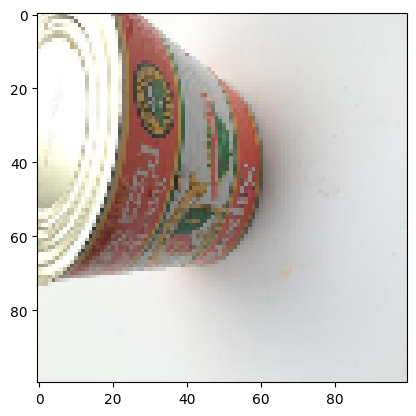

In [5]:
plt.imshow(img_dict['image'][0]/255)
plt.show()

In [6]:
img_dict['class_name']

['metal',
 'glass',
 'biological',
 'paper',
 'battery',
 'trash',
 'cardboard',
 'shoes',
 'clothes',
 'plastic']

In [7]:
print('Ex: ' + str(img_dict['class_no'][:5]))
print('Unique value: ' + str(np.unique(img_dict['class_no'])))
print('Size: ' + str(len(img_dict['class_no'])))

Ex: [0, 0, 0, 0, 0]
Unique value: [0 1 2 3 4 5 6 7 8 9]
Size: 21984


In [3]:
X = img_dict['image']

print(X[0])
print(X.shape)
print(X.dtype)

[[[254. 254. 248.]
  [236. 228. 210.]
  [247. 242. 227.]
  ...
  [227. 229. 226.]
  [227. 229. 226.]
  [227. 229. 226.]]

 [[241. 240. 225.]
  [252. 250. 232.]
  [240. 243. 226.]
  ...
  [229. 231. 228.]
  [227. 229. 226.]
  [227. 229. 226.]]

 [[250. 247. 228.]
  [237. 239. 218.]
  [234. 234. 209.]
  ...
  [229. 231. 228.]
  [228. 230. 227.]
  [228. 230. 227.]]

 ...

 [[241. 243. 238.]
  [239. 241. 236.]
  [240. 242. 237.]
  ...
  [218. 222. 221.]
  [218. 222. 221.]
  [216. 220. 219.]]

 [[243. 245. 240.]
  [240. 242. 237.]
  [240. 242. 237.]
  ...
  [217. 221. 220.]
  [217. 221. 220.]
  [217. 221. 220.]]

 [[241. 243. 238.]
  [238. 240. 235.]
  [240. 242. 237.]
  ...
  [217. 221. 220.]
  [217. 221. 220.]
  [217. 221. 220.]]]
(21984, 100, 100, 3)
float32


In [4]:
# one-hot encoding
labels = []
for no in img_dict['class_no']:
    buf = np.zeros(len(img_dict['class_name']), dtype='float32')
    buf[no] = 1
    labels.append(buf)

y = np.array(labels, dtype='float32')

print(y[0])
print(y.shape)
print(y.dtype)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(21984, 10)
float32


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=img_dict['class_no'], shuffle=True, random_state=22)

In [12]:
X_train.shape

(15388, 100, 100, 3)

In [13]:
X_test.shape

(6596, 100, 100, 3)

In [14]:
y_train[:20]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [15]:
y_train.shape

(15388, 10)

In [16]:
y_test.shape

(6596, 10)

In [7]:
# compare ratio of original data with splitted data 
print('Original data\n')
unique_class = np.unique(img_dict['class_no'], return_counts=True)
print('Class\tCount\t70%')
for num, count in zip(unique_class[0], unique_class[1]):
    print(f'{num}\t{count}\t{round(count*0.7,1)}')
print('\n--------------------------\n')

print('Train data\n')
unique_class_train = [no.argmax() for no in y_train]
unique_class_train = np.unique(unique_class_train, return_counts=True)
print('Class\tCount')
for num, count in zip(unique_class_train[0], unique_class_train[1]):
    print(f'{num}\t{count}')

Original data

Class	Count	70%
0	1986	1390.2
1	3737	2615.9
2	985	689.5
3	2092	1464.4
4	945	661.5
5	697	487.9
6	1938	1356.6
7	1977	1383.9
8	5325	3727.5
9	2302	1611.4

--------------------------

Train data

Class	Count
0	1390
1	2616
2	689
3	1464
4	662
5	488
6	1357
7	1384
8	3727
9	1611


In [24]:
# before normalize
min = X_train.min()
max = X_train.max()
print(X_train[0])
print('\nMin: ' + str(min))
print('Max: ' + str(max))

[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [253. 253. 253.]
  [253. 253. 253.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [254. 254. 254.]
  [253. 253. 253.]
  [253. 253. 253.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [249. 249. 249.]
  [254. 254. 254.]
  [254. 254. 254.]]

 ...

 [[ 52.  49.  75.]
  [ 52.  50.  73.]
  [ 52.  50.  70.]
  ...
  [ 45.  44.  64.]
  [ 50.  51.  72.]
  [ 50.  51.  72.]]

 [[ 52.  50.  74.]
  [ 52.  50.  72.]
  [ 52.  50.  71.]
  ...
  [ 56.  55.  75.]
  [ 50.  51.  72.]
  [ 50.  51.  72.]]

 [[ 52.  50.  72.]
  [ 52.  50.  72.]
  [ 52.  50.  72.]
  ...
  [ 53.  51.  72.]
  [ 50.  51.  72.]
  [ 50.  51.  72.]]]

Min: 0.0
Max: 255.0


In [25]:
# min-max normalization
# X_train = (X_train - min) / max
X_train /= 255
X_test /= 255

In [26]:
# after normalize
min = X_train.min()
max = X_train.max()
print(X_train[0])
print('\nMin: ' + str(min))
print('Max: ' + str(max))

[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.99607843 0.99607843 0.99607843]
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.9764706  0.9764706  0.9764706 ]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]]

 ...

 [[0.20392157 0.19215687 0.29411766]
  [0.20392157 0.19607843 0.28627452]
  [0.20392157 0.19607843 0.27450982]
  ...
  [0.1764706  0.17254902 0.2509804 ]
  [0.19607843 0.2        0.28235295]
  [0.19607843 0.2        0.28235295]]

 [[0.20392157 0.19607843 0.2901961 ]
  [0.20392157 0.19607843 0.28235295]


In [9]:
import tensorflow as tf

from keras import models
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint

In [22]:
# create CNN model with keras
np.random.seed(22)
tf.random.set_seed(22)

model = models.Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
model.add(Dropout(0.4))

model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(2116, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [23]:
# summarize layers of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 23, 23, 64)        0

In [24]:
# config model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [25]:
# crate checkpoint to auto save best model every epoch
best_model_checkpoint_callback = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', verbose=1, save_best_only=True, 
                                      save_weights_only=False,mode='min', save_freq='epoch')

In [26]:
# train model
history = model.fit(x=X_train, y=y_train, epochs=20, verbose=1, validation_data=(X_test, y_test),
                    shuffle=True, batch_size=64, callbacks=[best_model_checkpoint_callback])

Epoch 1/20
241/241 [==============================] - ETA: 0s - loss: 2.4172 - accuracy: 0.3222
Epoch 1: val_loss improved from inf to 1.59495, saving model to best_model.h5
241/241 [==============================] - 426s 2s/step - loss: 2.4172 - accuracy: 0.3222 - val_loss: 1.5950 - val_accuracy: 0.4388
Epoch 2/20
241/241 [==============================] - ETA: 0s - loss: 1.2981 - accuracy: 0.5520
Epoch 2: val_loss improved from 1.59495 to 1.19850, saving model to best_model.h5
241/241 [==============================] - 417s 2s/step - loss: 1.2981 - accuracy: 0.5520 - val_loss: 1.1985 - val_accuracy: 0.5951
Epoch 3/20
241/241 [==============================] - ETA: 0s - loss: 0.9508 - accuracy: 0.6781
Epoch 3: val_loss improved from 1.19850 to 1.00463, saving model to best_model.h5
241/241 [==============================] - 420s 2s/step - loss: 0.9508 - accuracy: 0.6781 - val_loss: 1.0046 - val_accuracy: 0.6665
Epoch 4/20
241/241 [==============================] - ETA: 0s - loss: 0.69

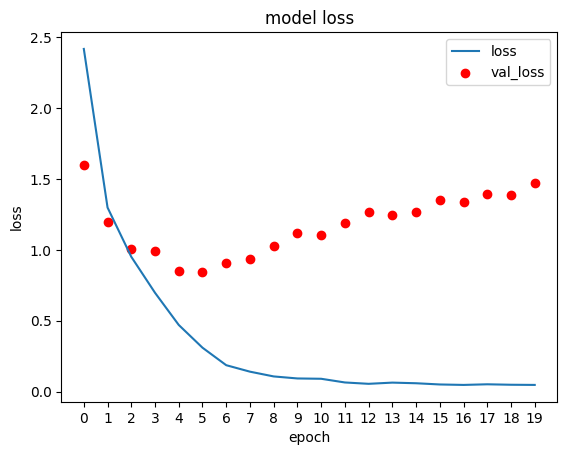

val_loss start to increase at epoch = 6
we can assume that model start to overfit at epoch = 6
then best model should be epoch = 5


In [82]:
# loss graph
plt.plot(history.history['loss'])
plt.scatter(range(0,20), history.history['val_loss'], c='r')
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.xticks(range(0,20))
plt.show()

print('val_loss start to increase at epoch = 6')
print('we can assume that model start to overfit at epoch = 6')
print('then best model should be epoch = 5')

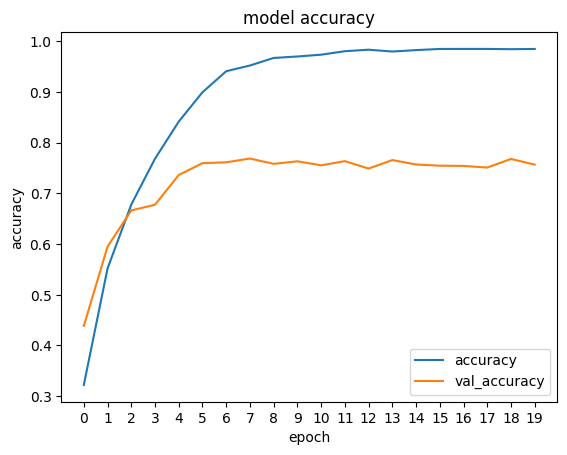

In [44]:
# accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.xticks(range(1,20))
plt.show()

In [79]:
# print best model score
print('best model score')
print('accuracy: {}\nloss: {}\nval_accuracy: {}\nval_loss: {}'.format(history.history['accuracy'][6], history.history['loss'][6], 
      history.history['val_accuracy'][6], history.history['val_accuracy'][6]))

best model score
accuracy: 0.9410579800605774
loss: 0.18614767491817474
val_accuracy: 0.7613705396652222
val_loss: 0.7613705396652222


In [83]:
# save history.history -> dict
with open('history.obj', 'wb') as file:
    pickle.dump(history.history, file)

In [10]:
# load best model (epoch=5 in graph)
model = models.load_model('best_model.h5')

In [85]:
# test 1 pic
# output = model.predict(x=np.array([X_test[0]]), batch_size=1, verbose=1)
# output

In [27]:
# test all pic
y_pred = model.predict(x=X_test, batch_size=None, verbose=1)
y_pred

207/207 [==============================] - 51s 209ms/step


array([[9.5246547e-01, 4.3612199e-05, 4.6739979e-06, ..., 6.5831009e-06,
        1.2476410e-05, 3.2442193e-02],
       [1.9895650e-05, 5.1500467e-07, 2.9072134e-09, ..., 2.8420507e-06,
        8.0761984e-06, 1.6435544e-06],
       [7.9224414e-01, 5.2726810e-04, 6.0389847e-03, ..., 1.4746334e-02,
        1.4616163e-01, 1.6108921e-04],
       ...,
       [1.6607076e-04, 1.7181530e-06, 1.5114609e-03, ..., 2.3670271e-02,
        9.7385651e-01, 2.7477409e-04],
       [6.9457013e-09, 7.1650485e-16, 1.9527697e-11, ..., 3.4346664e-10,
        1.0000000e+00, 1.6628796e-11],
       [1.2261428e-06, 9.9468656e-09, 1.2680241e-03, ..., 1.5694725e-06,
        9.9796677e-01, 1.5050821e-06]], dtype=float32)

In [28]:
# change y_pred to class number
pred_class = [np.argmax(pred) for pred in y_pred]
pred_class

[0,
 4,
 0,
 3,
 8,
 2,
 0,
 1,
 9,
 0,
 9,
 1,
 1,
 6,
 4,
 0,
 6,
 8,
 5,
 7,
 1,
 0,
 3,
 6,
 3,
 9,
 6,
 8,
 9,
 1,
 0,
 8,
 7,
 1,
 8,
 8,
 0,
 1,
 2,
 9,
 8,
 8,
 0,
 7,
 1,
 1,
 7,
 8,
 0,
 3,
 1,
 6,
 6,
 5,
 8,
 8,
 3,
 8,
 1,
 3,
 6,
 6,
 7,
 7,
 8,
 4,
 9,
 2,
 1,
 6,
 1,
 7,
 8,
 0,
 1,
 8,
 1,
 8,
 9,
 1,
 5,
 6,
 9,
 8,
 0,
 3,
 2,
 0,
 1,
 3,
 8,
 1,
 8,
 8,
 1,
 0,
 0,
 1,
 7,
 9,
 0,
 8,
 8,
 9,
 8,
 8,
 3,
 3,
 1,
 1,
 8,
 8,
 0,
 5,
 6,
 0,
 8,
 3,
 3,
 2,
 0,
 2,
 8,
 7,
 6,
 9,
 8,
 8,
 1,
 4,
 8,
 7,
 4,
 4,
 0,
 8,
 1,
 3,
 3,
 3,
 8,
 0,
 8,
 7,
 8,
 1,
 8,
 8,
 1,
 7,
 7,
 1,
 4,
 8,
 9,
 1,
 1,
 1,
 9,
 1,
 3,
 7,
 6,
 0,
 3,
 0,
 6,
 9,
 8,
 0,
 9,
 3,
 1,
 8,
 3,
 3,
 8,
 1,
 7,
 8,
 7,
 0,
 7,
 0,
 3,
 1,
 2,
 1,
 8,
 3,
 0,
 1,
 5,
 0,
 3,
 2,
 8,
 8,
 7,
 8,
 2,
 3,
 8,
 8,
 8,
 8,
 1,
 8,
 8,
 7,
 8,
 6,
 8,
 8,
 8,
 8,
 8,
 9,
 1,
 1,
 0,
 7,
 1,
 6,
 2,
 0,
 8,
 9,
 5,
 9,
 7,
 1,
 0,
 7,
 8,
 2,
 7,
 8,
 6,
 6,
 6,
 2,
 8,
 1,
 8,
 1,
 1,
 2,
 7,
 8,


In [29]:
# change y_test to class number
real_class = [np.argmax(real) for real in y_test]
real_class

[0,
 4,
 0,
 3,
 8,
 9,
 0,
 1,
 9,
 0,
 9,
 1,
 4,
 4,
 4,
 0,
 6,
 8,
 1,
 7,
 1,
 0,
 5,
 6,
 3,
 9,
 6,
 8,
 9,
 9,
 6,
 8,
 4,
 1,
 8,
 4,
 5,
 1,
 2,
 1,
 0,
 8,
 6,
 7,
 9,
 1,
 8,
 8,
 5,
 3,
 1,
 3,
 6,
 5,
 8,
 8,
 3,
 8,
 1,
 3,
 6,
 6,
 7,
 7,
 8,
 4,
 9,
 2,
 1,
 2,
 1,
 7,
 8,
 0,
 1,
 8,
 1,
 8,
 9,
 9,
 5,
 3,
 9,
 7,
 8,
 8,
 9,
 1,
 1,
 3,
 8,
 1,
 8,
 8,
 1,
 0,
 0,
 1,
 7,
 9,
 0,
 8,
 8,
 2,
 8,
 8,
 3,
 7,
 1,
 1,
 8,
 8,
 0,
 5,
 6,
 0,
 8,
 3,
 3,
 2,
 9,
 6,
 8,
 0,
 3,
 9,
 8,
 8,
 1,
 4,
 3,
 7,
 4,
 4,
 0,
 8,
 1,
 8,
 3,
 2,
 8,
 1,
 8,
 1,
 8,
 1,
 8,
 8,
 1,
 7,
 7,
 1,
 4,
 8,
 9,
 1,
 1,
 1,
 9,
 1,
 0,
 3,
 6,
 0,
 3,
 0,
 6,
 9,
 8,
 0,
 6,
 3,
 1,
 8,
 3,
 3,
 8,
 1,
 7,
 8,
 7,
 0,
 4,
 0,
 3,
 5,
 2,
 9,
 8,
 3,
 8,
 1,
 9,
 0,
 3,
 2,
 3,
 8,
 7,
 8,
 2,
 3,
 3,
 8,
 8,
 7,
 1,
 8,
 1,
 7,
 7,
 6,
 8,
 8,
 8,
 6,
 8,
 9,
 9,
 5,
 8,
 7,
 1,
 6,
 2,
 0,
 8,
 9,
 5,
 9,
 7,
 1,
 0,
 7,
 8,
 2,
 4,
 4,
 6,
 6,
 6,
 2,
 8,
 8,
 8,
 1,
 1,
 2,
 7,
 8,


In [30]:
# evaluate model performance
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(real_class, pred_class))
print(classification_report(real_class, pred_class))

[[ 387   51   20   37    9    0    7   35   30   20]
 [  31  918   24   19    3   12   11   29    9   65]
 [   8   15  217   14    0    0   10    8   19    5]
 [   7   18    5  508    2    3   24   10   35   16]
 [  23   16    4    7  152    4   12   33   23    9]
 [   9   39    2   23    6  100    3   11    0   16]
 [  12   17   10   39    1    1  443   17   15   26]
 [  11   37   33   38   15    1   15  368   63   12]
 [  19   20    8   52    6    0   13   27 1431   22]
 [  15   61   12   36    4   22   17   12   25  487]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       596
           1       0.77      0.82      0.79      1121
           2       0.65      0.73      0.69       296
           3       0.66      0.81      0.73       628
           4       0.77      0.54      0.63       283
           5       0.70      0.48      0.57       209
           6       0.80      0.76      0.78       581
           7       0.67      0.62   

In [31]:
import seaborn as sns

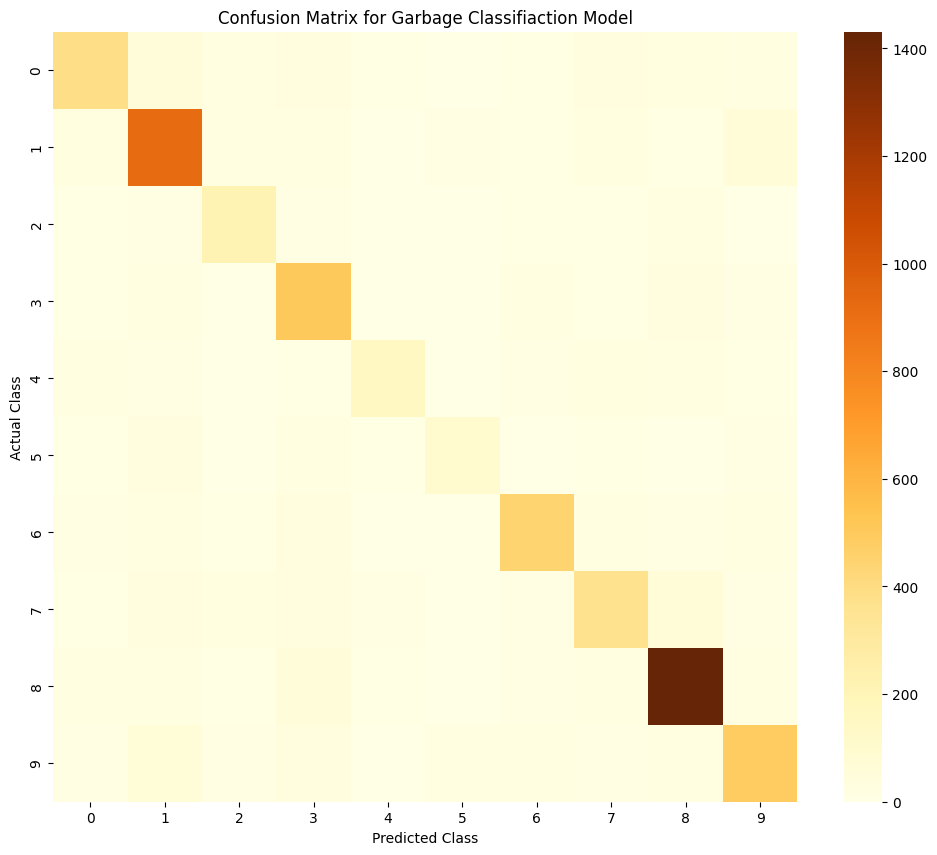

In [69]:
conf = confusion_matrix(real_class, pred_class)
plt.figure(figsize=(12,10))
sns.heatmap(conf, cmap='YlOrBr')
plt.title('Confusion Matrix for Garbage Classifiaction Model')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

In [64]:
from sklearn.metrics import f1_score

In [77]:
print('Micro F1 score: ' + str(f1_score(real_class, pred_class, average='micro')))
print('Macro F1 score: ' + str(f1_score(real_class, pred_class, average='macro')))

Micro F1 score: 0.7597028502122498
Macro F1 score: 0.7115748845298595
